In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('.\data\Intel_CPUs.csv', sep=",")
#https://www.kaggle.com/iliassekkaf/computerparts/version/1#

In [3]:
data.shape
data.head()

,Product_Collection,Vertical_Segment,Processor_Number,Status,Launch_Date,Lithography,Recommended_Customer_Price,nb_of_Cores,nb_of_Threads,Processor_Base_Frequency,...,Idle_States,Enhanced_Intel_SpeedStep_Technology,Thermal_Monitoring_Technologies,Intel_Flex_Memory_Access,Intel_Identity_Protection_Technology_,Intel_Smart_Response_Technology,Intel_AES_New_Instructions,Secure_Key,Intel_Software_Guard_Extensions_Intel_SGX,Execute_Disable_Bit
0,7th Generation Intel® Core™ i7 Processors,Mobile,i7-7Y75,Launched,Q3'16,14 nm,$393.00,2,4.0,1.30 GHz,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,8th Generation Intel® Core™ i5 Processors,Mobile,i5-8250U,Launched,Q3'17,14 nm,$297.00,4,8.0,1.60 GHz,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,8th Generation Intel® Core™ i7 Processors,Mobile,i7-8550U,Launched,Q3'17,14 nm,$409.00,4,8.0,1.80 GHz,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,Intel® Core™ X-series Processors,Desktop,i7-3820,End of Life,Q1'12,32 nm,$305.00,4,8.0,3.60 GHz,...,Yes,Yes,Yes,NaN,Yes,Yes,Yes,NaN,NaN,Yes
4,7th Generation Intel® Core™ i5 Processors,Mobile,i5-7Y57,Launched,Q1'17,14 nm,$281.00,2,4.0,1.20 GHz,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [4]:
data.columns

Index(['Product_Collection', 'Vertical_Segment', 'Processor_Number', 'Status',
       'Launch_Date', 'Lithography', 'Recommended_Customer_Price',
       'nb_of_Cores', 'nb_of_Threads', 'Processor_Base_Frequency',
       'Max_Turbo_Frequency', 'Cache', 'Bus_Speed', 'TDP',
       'Configurable_TDP_up_Frequency', 'Configurable_TDP_up',
       'Configurable_TDP_down_Frequency', 'Configurable_TDP_down',
       'Embedded_Options_Available', 'Conflict_Free', 'Max_Memory_Size',
       'Memory_Types', 'Max_nb_of_Memory_Channels', 'Max_Memory_Bandwidth',
       'ECC_Memory_Supported', 'Processor_Graphics_',
       'Graphics_Base_Frequency', 'Graphics_Max_Dynamic_Frequency',
       'Graphics_Video_Max_Memory', 'Graphics_Output', 'Support_4k',
       'Max_Resolution_HDMI', 'Max_Resolution_DP',
       'Max_Resolution_eDP_Integrated_Flat_Panel', 'DirectX_Support',
       'OpenGL_Support', 'Intel_Quick_Sync_Video', 'Intel_InTru_3D_Technology',
       'Intel_Clear_Video_HD_Technology', 'Intel_Clear_Vi

### Удаляем колонки с большим числом пропусков

In [5]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))
print('Shape {}'.format(data.shape))

#Определим пропущенные значения, и удалим колонки с более чем 30% пропусков:
col_with_missing_values = []
col_for_del = []
data_refactor = data
num_of_del_cols = 0
for col in data.columns:
    if data[col].isnull().sum() > 0:
        col_with_missing_values.append(col)
        percent = round((data[col].isnull().sum()/total_count)*100,2)
        if percent > 30:
            data_refactor = data_refactor.drop(col, axis=1)
            col_with_missing_values.append(col)
            num_of_del_cols =num_of_del_cols + 1
            print("В колонке \"{0}\" ({1}) пропущенно {2}% значений. Удаляю!".format(col,data[col].dtype ,percent))
        else:
            print("В колонке \"{0}\" ({1}) пропущенно {2}% значений.".format(col,data[col].dtype ,percent))
print('Удалено {} колонки.'.format(num_of_del_cols))

Всего строк: 2283
Shape (2283, 64)
В колонке "Processor_Number" (object) пропущенно 15.29% значений.
В колонке "Launch_Date" (object) пропущенно 18.05% значений.
В колонке "Lithography" (object) пропущенно 3.11% значений.
В колонке "Recommended_Customer_Price" (object) пропущенно 43.01% значений. Удаляю!
В колонке "nb_of_Threads" (float64) пропущенно 37.49% значений. Удаляю!
В колонке "Processor_Base_Frequency" (object) пропущенно 0.79% значений.
В колонке "Max_Turbo_Frequency" (object) пропущенно 59.96% значений. Удаляю!
В колонке "Cache" (object) пропущенно 0.53% значений.
В колонке "Bus_Speed" (object) пропущенно 12.88% значений.
В колонке "TDP" (object) пропущенно 2.93% значений.
В колонке "Configurable_TDP_up_Frequency" (object) пропущенно 99.04% значений. Удаляю!
В колонке "Configurable_TDP_up" (object) пропущенно 98.86% значений. Удаляю!
В колонке "Configurable_TDP_down_Frequency" (object) пропущенно 97.33% значений. Удаляю!
В колонке "Configurable_TDP_down" (object) пропущенно 

In [6]:
data = data_refactor # Обновим датасет, удалены колонки с большим числом пропусков

# Удалим пожалуй еще несколько..
data = data.drop(['Intel_Hyper_Threading_Technology_','Intel_64_','Instruction_Set','Idle_States','Enhanced_Intel_SpeedStep_Technology', 'Execute_Disable_Bit'], axis = 1)
print('Cols num: {}'.format(data.shape[1]))
print('Shape {}'.format(data.shape))

Cols num: 15
Shape (2283, 15)


In [7]:
#Просмотрим обновленный датасет:
for col in data.columns:
        percent = round((data[col].isnull().sum()/total_count)*100,2)
        print("В колонке \"{0}\" ({1}) пропущенно {2}% значений.".format(col,data[col].dtype ,percent))

В колонке "Product_Collection" (object) пропущенно 0.0% значений.
В колонке "Vertical_Segment" (object) пропущенно 0.0% значений.
В колонке "Processor_Number" (object) пропущенно 15.29% значений.
В колонке "Status" (object) пропущенно 0.0% значений.
В колонке "Launch_Date" (object) пропущенно 18.05% значений.
В колонке "Lithography" (object) пропущенно 3.11% значений.
В колонке "nb_of_Cores" (int64) пропущенно 0.0% значений.
В колонке "Processor_Base_Frequency" (object) пропущенно 0.79% значений.
В колонке "Cache" (object) пропущенно 0.53% значений.
В колонке "Bus_Speed" (object) пропущенно 12.88% значений.
В колонке "TDP" (object) пропущенно 2.93% значений.
В колонке "Embedded_Options_Available" (object) пропущенно 0.04% значений.
В колонке "T" (object) пропущенно 11.39% значений.
В колонке "Intel_Turbo_Boost_Technology" (object) пропущенно 5.83% значений.
В колонке "Intel_Virtualization_Technology_VTx_" (object) пропущенно 3.81% значений.


***
### Подготовимся к анализу данных на зависимости: 
##### Добавим новый супер признак, удалим лишнии признаки, кодирование категориальных данных,  перевод некоторых str в float, заполнение некоторых данных most_frequent, удаление некоторых признаков.

In [8]:
#Удалим данные, которые в нашей задаче нас не интересуют: Processor_Number,
data = data.drop(['Processor_Number'], axis = 1)

In [9]:
print('Еще раз, аналитика на колонки:\n')
for col in data.columns:
    percent = round((data[col].isnull().sum()/data.shape[0])*100,2)
    print("Пропущенно: {0}%\t Уникальных: {1}\t\t {2}".format(percent, data[col].nunique(), col))

Еще раз, аналитика на колонки:

Пропущенно: 0.0%	 Уникальных: 75		 Product_Collection
Пропущенно: 0.0%	 Уникальных: 4		 Vertical_Segment
Пропущенно: 0.0%	 Уникальных: 4		 Status
Пропущенно: 18.05%	 Уникальных: 67		 Launch_Date
Пропущенно: 3.11%	 Уникальных: 10		 Lithography
Пропущенно: 0.0%	 Уникальных: 22		 nb_of_Cores
Пропущенно: 0.79%	 Уникальных: 114		 Processor_Base_Frequency
Пропущенно: 0.53%	 Уникальных: 110		 Cache
Пропущенно: 12.88%	 Уникальных: 34		 Bus_Speed
Пропущенно: 2.93%	 Уникальных: 250		 TDP
Пропущенно: 0.04%	 Уникальных: 2		 Embedded_Options_Available
Пропущенно: 11.39%	 Уникальных: 260		 T
Пропущенно: 5.83%	 Уникальных: 3		 Intel_Turbo_Boost_Technology
Пропущенно: 3.81%	 Уникальных: 3		 Intel_Virtualization_Technology_VTx_


In [10]:
data.shape

(2283, 14)

In [11]:
#Заполним пропуски в данных используя SimpleImputer. Колонки: Launch_Date, Bus_Speed, T.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['Launch_Date'] = imputer.fit_transform(data[['Launch_Date']])
data['Bus_Speed'] = imputer.fit_transform(data[['Bus_Speed']])
data['T'] = imputer.fit_transform(data[['T']])
data = data.dropna(axis=0, how='any')
data.shape

(2122, 14)

In [12]:
#Выведем значения чтобы потом было проще составить API.
print("Intel_Virtualization_Technology_VTx_: " + str(data['Intel_Virtualization_Technology_VTx_'].unique()))
print("Intel_Turbo_Boost_Technology: " + str(data['Intel_Turbo_Boost_Technology'].unique()))
print("Embedded_Options_Available: " + str(data['Embedded_Options_Available'].unique()))

Intel_Virtualization_Technology_VTx_: ['Yes' 'No' 'See Ordering Info']
Intel_Turbo_Boost_Technology: ['2.0' 'No' '1.0']
Embedded_Options_Available: ['No' 'Yes']


In [13]:
#Исправим See Ordering Info, стоит проверить остальные клонки с небольшим числом значений
data['Intel_Virtualization_Technology_VTx_'].describe()
data['Intel_Virtualization_Technology_VTx_'] = data['Intel_Virtualization_Technology_VTx_'].replace(['See Ordering Info'], "Yes")
print("Intel_Virtualization_Technology_VTx_: " + str(data['Intel_Virtualization_Technology_VTx_'].unique()))


Intel_Virtualization_Technology_VTx_: ['Yes' 'No']


In [14]:
#Объеденим колонки: Intel_Virtualization_Technology_VTx_ , Intel_Turbo_Boost_Technology, Embedded_Options_Available  в одну.
data['VT_TBT_EmbOption'] = data['Intel_Virtualization_Technology_VTx_'].astype(str) + " + " + data['Intel_Turbo_Boost_Technology'].astype(str) + " + " + data['Embedded_Options_Available'].astype(str)
data = data.drop(['Intel_Virtualization_Technology_VTx_' , 'Intel_Turbo_Boost_Technology', 'Embedded_Options_Available'], axis = 1)



*Отдельная п/задача: преобразование категориальных признаков в числовые, а также преобразование категориальных признаков, по существу являющихся числовыми - T, Processor_Base_Frequency, Lithography*

*Заранее увидел, что часть данных имеет **странный** вид. Если такие аномалии встречаются редко, то удалим их.*

In [15]:
#Выведем все уникальные значения для каждой колонки и количество повторений таких значений
for col in data.columns:
    print("{0}, unique vals - {1}:".format(col, data[col].nunique()))
    print(data[col].value_counts())
    print("\n\n")
#По результатам: 
#Bus_Speed стоит удалить (сложно перекодить), 
#глянуть и выбрать плохие значения из T, а затем заменить строки где это встречается..
#а затем посмотреть на все оставишиеся уникальные знчения

Product_Collection, unique vals - 68:
Legacy Intel® Core™ Processors                 373
Legacy Intel® Pentium® Processor               275
Legacy Intel® Xeon® Processors                 260
Legacy Intel® Celeron® Processor               194
Intel® Xeon® Scalable Processors                58
4th Generation Intel® Core™ i5 Processors       55
Intel® Xeon® Processor E5 v2 Family             47
Intel® Xeon® Processor E5 v3 Family             47
4th Generation Intel® Core™ i7 Processors       45
Intel® Xeon® Processor E5 Family                43
Intel® Xeon® Processor E5 v4 Family             43
Intel® Pentium® Processor G Series              41
Legacy Intel Atom® Processors                   41
4th Generation Intel® Core™ i3 Processors       37
Intel® Atom™ Processor C Series                 32
Intel® Xeon® Processor E3 v3 Family             25
Intel® Core™ X-series Processors                24
Intel® Xeon® Processor E3 v5 Family             23
6th Generation Intel® Core™ i5 Processors   

In [16]:
data = data.drop("Bus_Speed", axis=1)
data_for_API = data #сохраним на будущее, т.к. потом data будет изменена.
data.shape

(2122, 11)

In [17]:
#В данной колонке 2048 из 2122 значений можно распарсить в цифры
#Найдем не валидные значения (a-la: "C1+D1=75°C; M0=72°C"), заменим их самыми частыми  значениями.
import re
regex_is_valid = r'^[0-9\.°\sCС]*$'
not_valid = []
for val in data['T']:
    if not re.match(regex_is_valid, val):
        not_valid.append(val)        
data['T'] = data['T'].replace(list(set(not_valid)), str(data['T'].describe()["top"]))

#Теперь все красиво, можем начать преобразовывать в числовые данные:
regex_val = r'[0-9\.]{1,7}'
def parse_and_code_values(regex, col_name, data):
    for val in data[col_name]:
        match = re.search(regex, val)
        if not match:
            print(val)
            print("FAIL")
        else:
            data[col_name] = data[col_name].replace([val], match.group())
    return data
            
data = parse_and_code_values(regex_val, "T", data)            
# data['T'] = pd.DataFrame({ "T" : pd.to_numeric(pd.Series(parsed_temperature)) })
# как оказалось, из строки выше будут удалены теже строки что и ранее в дата сете.

In [18]:
#Далее распарсим TDP, Processor_Base_Frequency, Lithography, Cache.
regex_num = r'[0-9\.]*'

#TDP:
data = parse_and_code_values(regex_num, "TDP", data)

#Processor_Base_Frequency:
data = parse_and_code_values(regex_num, "Processor_Base_Frequency", data)

#Lithography
data = parse_and_code_values(regex_num, "Lithography", data)

#Cache
data = parse_and_code_values(regex_num, "Cache", data)


In [19]:
#Перекодирует обработанные столбцы во float
data = data.astype({"TDP" : float, "Cache" : float, "Lithography" : float,"Processor_Base_Frequency" : float, "T" : float, "nb_of_Cores" : float})

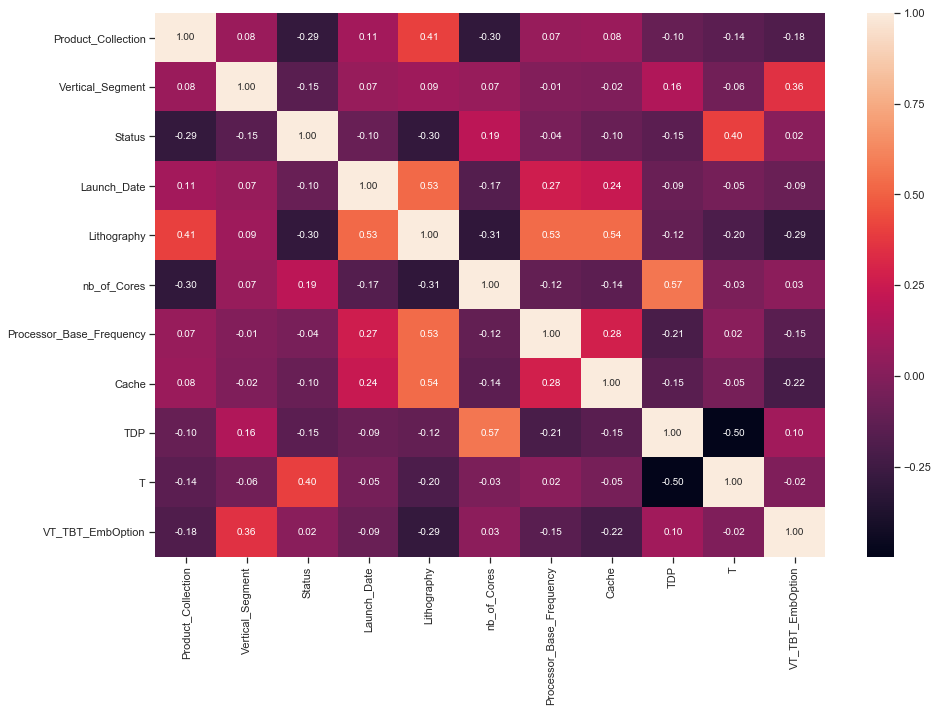

In [20]:
# #Попробуем кодированием количеством эелемнтов в категории (возможно не самое правильное, т.к. например у двух категорий можетбыть одинаковое число элементов):
data["Product_Collection"] = data["Product_Collection"].map(data.groupby("Product_Collection").size())
data["Vertical_Segment"] = data["Vertical_Segment"].map(data.groupby("Vertical_Segment").size())
data["Status"] = data["Status"].map(data.groupby("Status").size())
data["Launch_Date"] = data["Launch_Date"].map(data.groupby("Launch_Date").size())
data["VT_TBT_EmbOption"] = data["VT_TBT_EmbOption"].map(data.groupby("VT_TBT_EmbOption").size())
data = data.astype({"Product_Collection" : int, "Vertical_Segment" : float, "Status" : float,"Launch_Date" : float, "T" : float, "VT_TBT_EmbOption" : float})

#Simple Dummy
# data = pd.get_dummies(data)

fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

### Развернем и настроим алгоритм

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, KFold, LeaveOneOut, GridSearchCV,train_test_split, ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from typing import Dict

def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = round(accuracy_score(temp_data_flt['t'].values,temp_data_flt['p'].values)*100,2)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes_and_get_list(
    model_name,
    type,
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    result = [model_name, type]
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        result.append(accs[i])
        print('{} \t {}%'.format(i, accs[i]))


In [22]:
#Разделим на тестовую и обучающую выборки:
train_x, test_x, train_y, test_y = train_test_split(data.drop("Product_Collection", axis=1), data["Product_Collection"], test_size=0.3, random_state=1)

In [23]:
#DecisionTreeClassifier
decision_tree_first = DecisionTreeClassifier(max_depth = 4)
decision_tree_first.fit(train_x, train_y)

predict_y = decision_tree_first.predict(test_x)
print_accuracy_score_for_classes_and_get_list("DecisionTreeClassifier","base",test_y,predict_y)

Метка 	 Accuracy
2 	 0.0%
4 	 0.0%
5 	 0.0%
6 	 66.67%
7 	 0.0%
8 	 0.0%
9 	 0.0%
10 	 0.0%
12 	 0.0%
13 	 0.0%
14 	 0.0%
18 	 0.0%
19 	 0.0%
20 	 0.0%
21 	 100.0%
22 	 0.0%
23 	 0.0%
24 	 0.0%
25 	 75.0%
32 	 75.0%
37 	 0.0%
41 	 0.0%
43 	 82.14%
45 	 0.0%
47 	 0.0%
55 	 0.0%
58 	 100.0%
194 	 42.31%
260 	 78.75%
275 	 73.86%
373 	 99.07%


In [24]:
#Оптимизируем:
DepthTP = range(1,150)
kf = KFold(n_splits=3)

tuned_parameters = [{'max_depth':DepthTP}]
decision_tree_classifier_grid_search = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=kf, scoring='accuracy')
decision_tree_classifier_grid_search.fit(test_x, test_y)
decision_tree_classifier_best_param = decision_tree_classifier_grid_search.best_params_.get('max_depth')
print("Лучший параметр (max_depth) решающие деревья (DecisionTreeClassifier): {}".format(decision_tree_classifier_best_param))

Лучший параметр (max_depth) решающие деревья (DecisionTreeClassifier): 124


In [25]:
#Посмотрим что вышло:
decision_tree_sec = DecisionTreeClassifier(max_depth = decision_tree_classifier_best_param)
decision_tree_sec.fit(train_x, train_y)

predict_y = decision_tree_sec.predict(test_x)
print_accuracy_score_for_classes_and_get_list("DecisionTreeClassifier","base",test_y,predict_y)
print(decision_tree_sec.score(test_x, test_y))

Метка 	 Accuracy
2 	 100.0%
4 	 80.0%
5 	 42.86%
6 	 66.67%
7 	 80.0%
8 	 76.92%
9 	 33.33%
10 	 60.0%
12 	 100.0%
13 	 78.57%
14 	 61.54%
18 	 77.78%
19 	 33.33%
20 	 30.77%
21 	 78.57%
22 	 90.91%
23 	 37.5%
24 	 37.5%
25 	 75.0%
32 	 87.5%
37 	 88.89%
41 	 85.19%
43 	 75.0%
45 	 90.0%
47 	 88.57%
55 	 80.0%
58 	 100.0%
194 	 90.38%
260 	 97.5%
275 	 92.05%
373 	 97.22%
0.8508634222919937


In [27]:
#Сохраним модель:
import pickle
pickle.dump(decision_tree_sec, open("obj/decision_tree_trained_model.save", 'wb'))
decision_tree_loaded = pickle.load(open("obj/decision_tree_trained_model.save", 'rb'))

### Конвертор данных приходящих по API в числовые признаки:

In [28]:
print("Формат данных которые будут нужны для алгоритма:")
print(data_for_API.head(1))
print("По сути данные и их кодировки:")
data_code = {}
target_cols = ["Vertical_Segment", "Status", "Launch_Date", "VT_TBT_EmbOption"]
for col in target_cols:
    data_code[col] = {}
    for key, val in data_for_API[col].value_counts().items():
        data_code[col][key] = val
# Словарь для преобразования кода процессора в название:
product_collection = {}
for key, val in data_for_API["Product_Collection"].value_counts().items():
        product_collection[str(val)] = key
        
#сохранимся:
pickle.dump(data_code, open("obj/data_code.save", 'wb'))
pickle.dump(product_collection, open("obj/product_collection.save", 'wb'))

Формат данных которые будут нужны для алгоритма:
                          Product_Collection Vertical_Segment    Status  \
0  7th Generation Intel® Core™ i7 Processors           Mobile  Launched   

  Launch_Date Lithography  nb_of_Cores Processor_Base_Frequency Cache  TDP  \
0       Q3'16          14            2                     1.30     4  4.5   

     T VT_TBT_EmbOption  
0  100   Yes + 2.0 + No  
По сути данные и их кодировки:


In [29]:
#Ожидаемый формат данных:
#7th Generation Intel® Core™ i7 Processors
test_json = \
{
 "Vertical_Segment" : "Mobile", 
 "Status" : "Launched", 
 "Launch_Date" : "Q3'16", 
 "Lithography" : 14.0, # От 22 до 250 без десятичных
 "nb_of_Cores" : 70.0,  # 1 - 72
 "Processor_Base_Frequency" : 1.3, #Нужно в приложухе сделать конвертр из MHz в GHz (внутренний)
 "Cache" : 4.0, 
 "TDP" : 4.5,
 "T" : 10,
 "Intel_Virtualization_Technology" : "Yes",
 "Intel_Turbo_Boost_Technology" : "2.0",
 "Embedded_Options_Available" : "No"
}

def get_data_frame_from_JSON(json):
    #Сначала объеденим три последних ключа:
    json["VT_TBT_EmbOption"] = str(json["Intel_Virtualization_Technology"]) + " + " + str(json["Intel_Turbo_Boost_Technology"]) + " + " + str(json["Embedded_Options_Available"])
    del json["Intel_Virtualization_Technology"]
    del json["Intel_Turbo_Boost_Technology"] 
    del json["Embedded_Options_Available"]
    #подготовим DF:
    for key, val in json.items():
        if key in data_code:
            # Нужна проверка если мы указали не существующий Lanunch Date
            json[key] = data_code[key][val]
    print("JSON to DataFrame")
    print(json)
    return pd.DataFrame(json, index=[0])
predict_val = decision_tree_loaded.predict(get_data_frame_from_JSON(test_json))
print("Predict: " + str(predict_val))
print(product_collection[str(predict_val[0])])
    

JSON to DataFrame
{'Vertical_Segment': 682, 'Status': 983, 'Launch_Date': 12, 'Lithography': 14.0, 'nb_of_Cores': 70.0, 'Processor_Base_Frequency': 1.3, 'Cache': 4.0, 'TDP': 4.5, 'T': 10, 'VT_TBT_EmbOption': 591}
Predict: [7]
Intel® Pentium® Processor N Series
